<a href="https://colab.research.google.com/github/hernss/MachineLearningCourse/blob/main/05_transfer_learning_in_tensorflow_fine_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning in TensorFlow Part 2: Fine Tunning

In [66]:
# Import helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-02-19 22:15:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-19 22:15:32 (104 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [67]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, walk_through_dir

## Let's get some data

In [68]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-02-19 22:15:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.251.31.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  41.2MB/s    in 4.5s    

2023-02-19 22:15:37 (35.7 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [69]:
walk_through_dir("/content/10_food_classes_10_percent/")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent/'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_1

In [70]:
# Create training and test directories
train_dir = "/content/10_food_classes_10_percent/train/"
test_dir = "/content/10_food_classes_10_percent/test/"

In [71]:
import tensorflow as tf

IMG_SIZE = (224,224)
BATCH_SIZE=32

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [72]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [73]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [74]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.00000000e+00 2.00000000e+00 0.00000000e+00]
   [1.07142830e+00 1.07142830e+00 0.00000000e+00]
   [1.00000000e+00 1.00000000e+00 0.00000000e+00]
   ...
   [1.87857361e+01 9.78573608e+00 2.78573608e+00]
   [1.85714149e+01 9.57141590e+00 2.57141542e+00]
   [1.66428566e+01 7.64285707e+00 6.42857194e-01]]

  [[2.00000000e+00 2.00000000e+00 0.00000000e+00]
   [1.07142830e+00 1.07142830e+00 0.00000000e+00]
   [1.00000000e+00 1.00000000e+00 0.00000000e+00]
   ...
   [1.87857361e+01 9.78573608e+00 2.78573608e+00]
   [2.08571301e+01 1.18571301e+01 4.85713005e+00]
   [1.95713940e+01 1.05713940e+01 3.57139397e+00]]

  [[2.00000000e+00 2.00000000e+00 0.00000000e+00]
   [1.07142830e+00 1.07142830e+00 0.00000000e+00]
   [1.00000000e+00 1.00000000e+00 0.00000000e+00]
   ...
   [2.00000229e+01 1.07857361e+01 1.78573608e+00]
   [2.09285583e+01 1.17142725e+01 2.71427250e+00]
   [1.90000000e+01 9.78571415e+00 7.85714149e-01]]

  ...

  [[1.67285721e+02 1.59285721e+02 1.56285721e+02]
   [1

# Creating a model with Functional API TensorFlow

 ## Model 0: Building a transfer model using keras Functional API

 

In [75]:
# 1. Create base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model
base_model.trainable= False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,), name="input_layer")

# 4. If using Resnet50V2 model you will need to normalize inputs, Efficientnet has build in rescaling
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(input)

# 5. Pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs and output with the model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 10. Fit the model
history_0 = model_0.fit(train_data, epochs=7, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data), callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extraction")])





Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230219-221542
Epoch 1/7
24/24 [==============================] - 15s 355ms/step - loss: 1.7326 - accuracy: 0.5053 - val_loss: 1.2072 - val_accuracy: 0.7496
Epoch 2/7
24/24 [==============================] - 8s 294ms/step - loss: 1.0161 - accuracy: 0.7840 - val_loss: 0.8222 - val_accuracy: 0.8320
Epoch 3/7
24/24 [==============================] - 8s 327ms/step - loss: 0.7500 - accuracy: 0.8427 - val_loss: 0.6677 - val_accuracy: 0.8508
Epoch 4/7
24/24 [==============================] - 12s 509ms/step - loss: 0.6062 - accuracy: 0.8693 - val_loss: 0.5891 - val_accuracy: 0.8584
Epoch 5/7
24/24 [==============================] - 7s 290ms/step - loss: 0.5227 - accuracy: 0.8787 - val_loss: 0.5400 - val_accuracy: 0.8640
Epoch 6/7
24/24 [==============================] - 7s 289ms/step - loss: 0.4573 -

In [76]:
# Evaluate the model
model_0.evaluate(test_data)

79/79 [==============================] - 7s 79ms/step - loss: 0.4834 - accuracy: 0.8744


[0.4834001958370209, 0.8744000196456909]

In [77]:
# Check the layers in out model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_5
1 rescaling_8
2 normalization_4
3 rescaling_9
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [78]:
# Get base model summay
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_8 (Rescaling)        (None, None, None,   0           ['input_5[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_4 (Normalization  (None, None, None,   7          ['rescaling_8[0][0]']            
 )                              3)                                                   

In [79]:
model_0.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


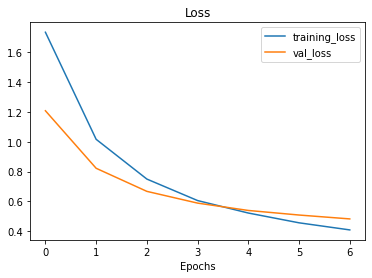

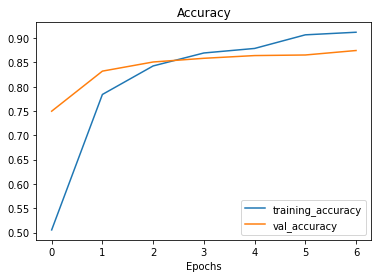

In [80]:
# Check out model loss curves
plot_loss_curves(history_0)

## Getting a feature vecrtor from a trained model

Let's use a similar shape (1,4,4,3) and then pass it to GlobalAveragePooling2D

In [81]:
input_shape=(1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor} \n")

# Pass random tensor through a global average polling layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(f"Output tensor:\n {global_average_pooled_tensor} \n")

# Check shape of different tensor
print(f"Shape of input tesnor: {input_tensor.shape}")
print(f"Shape of output tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

Output tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]] 

Shape of input tesnor: (1, 4, 4, 3)
Shape of output tensor: (1, 3)


In [82]:
# Let's replicate the global average pool 2d layer

tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [83]:
tf.reduce_mean(input_tensor[0,:,0])

<tf.Tensor: shape=(), dtype=float32, numpy=-0.28985116>

# Ruinning a series of transfer learning experiments


In [84]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2023-02-19 22:17:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.128, 108.177.119.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M  37.8MB/s    in 3.4s    

2023-02-19 22:17:21 (37.8 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [85]:
# Create training and test dirs
train_dir_1_percent = "/content/10_food_classes_1_percent/train/"
test_dir_1_percent = "/content/10_food_classes_1_percent/test/"

walk_through_dir(train_dir_1_percent)

There are 10 directories and 0 images in '/content/10_food_classes_1_percent/train/'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '/content/10_food_classes_1_pe

In [86]:
# Setup data loaders
IMG_SIZE = (224,224)

train_data_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent, label_mode="categorical", image_size=IMG_SIZE, batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent, image_size=IMG_SIZE, label_mode="categorical", batch_size=BATCH_SIZE)



Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation on layer

In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255),   # Not necesary for Efficientnet, use in ResNet50V2
  ],name="data_augmentation_layer"
  )

## Visualize our data augmentation layer

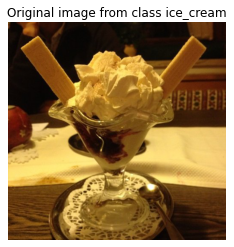

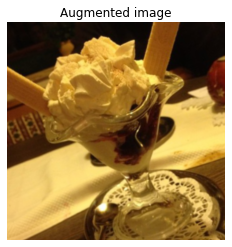

In [88]:
# View a random image and compare it with original image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1.class_names)
target_dir = "/content/10_food_classes_1_percent/train/" + target_class + "/"

random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + random_image
img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.title(f"Original image from class {target_class}")
plt.axis(False);

augmented_img = data_augmentation(tf.expand_dims(img, axis=0))

plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented image")
plt.axis(False);

## Building feature extraction model with data augmentation

In [140]:
input_shape=(224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# Add data augmentation layer
x = data_augmentation(inputs)

x = base_model(x, training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D()(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit  the model
history_1 = model_1.fit(train_data_1, 
                        epochs=5, 
                        steps_per_epoch=len(train_data_1), 
                        validation_data=test_data, 
                        validation_steps=len(test_data), 
                        callbacks=[create_tensorboard_callback("transfer_learning","1_percent_data_aug" )])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230219-224916
Epoch 1/5


3/3 [==============================] - 20s 5s/step - loss: 2.3082 - accuracy: 0.1714 - val_loss: 2.1916 - val_accuracy: 0.2068
Epoch 2/5
3/3 [==============================] - 8s 4s/step - loss: 2.0396 - accuracy: 0.3286 - val_loss: 2.0618 - val_accuracy: 0.3028
Epoch 3/5
3/3 [==============================] - 8s 4s/step - loss: 1.8113 - accuracy: 0.5143 - val_loss: 1.9511 - val_accuracy: 0.3908
Epoch 4/5
3/3 [==============================] - 11s 5s/step - loss: 1.6102 - accuracy: 0.6571 - val_loss: 1.8470 - val_accuracy: 0.4568
Epoch 5/5
3/3 [==============================] - 6s 3s/step - loss: 1.4629 - accuracy: 0.7857 - val_loss: 1.7510 - val_accuracy: 0.5112


In [90]:
# Check model summary
model_1.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, None, None, 3)    0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

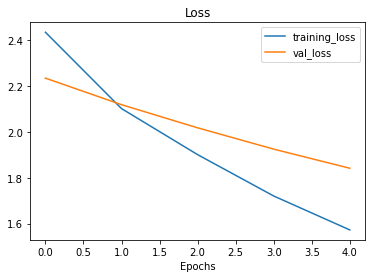

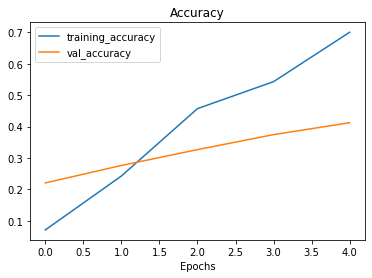

In [91]:
plot_loss_curves(history_1)

## Model 2: feature extraction model with 10 percent of data

In [116]:
train_dir = "/content/10_food_classes_10_percent/train/"
test_dir = "/content/10_food_classes_10_percent/test/"

# Set up data inputs
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [117]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0),
    preprocessing.RandomRotation(0.2),
    #Rescale is necessary for ResNet50V2
    #preprocessing.Rescaling(1./255)
    ], name="data_augmentation_layer"
)

input_shape=(224,224,3)

# Create a frozen base model (also called backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create inputs and outputs
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10, activation="softmax")(x)

# Create model 2
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, None, None, 3)    0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_7   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

## Creating a model checkpoint callbacks

In [118]:
# Set checkpoint path
checkpoint_path = "ten_percent_model_checkpoint_weights/checkpoint.ckpt"

# Create model checkpint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [119]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"), checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230219-222544
Epoch 1/5


24/24 [==============================] - ETA: 0s - loss: 1.9045 - accuracy: 0.3867
Epoch 1: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 22s 489ms/step - loss: 1.9045 - accuracy: 0.3867 - val_loss: 1.3946 - val_accuracy: 0.6812
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2303 - accuracy: 0.7147
Epoch 2: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 10s 416ms/step - loss: 1.2303 - accuracy: 0.7147 - val_loss: 0.9535 - val_accuracy: 0.7969
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9149 - accuracy: 0.7773
Epoch 3: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 11s 423ms/step - loss: 0.9149 - accuracy: 0.7773 - val_loss: 0.7780 - val_accuracy: 0.8297
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.7800 - accuracy: 0.8120
Epoch 4:

In [96]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 70ms/step - loss: 0.4834 - accuracy: 0.8744


[0.4834001362323761, 0.8744000196456909]

In [120]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 72ms/step - loss: 0.6018 - accuracy: 0.8524


[0.6017508506774902, 0.852400004863739]

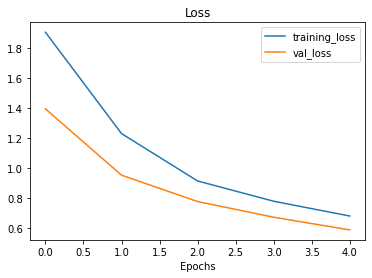

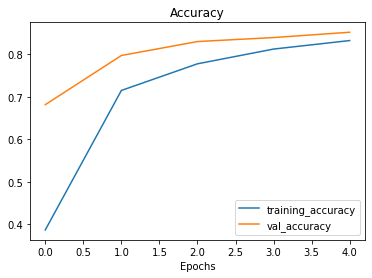

In [121]:
plot_loss_curves(history_2)

## Loading in checkpoint weights

In [122]:
model_2.load_weights(checkpoint_path)
model_2.evaluate(test_data)

79/79 [==============================] - 6s 70ms/step - loss: 0.6018 - accuracy: 0.8524


[0.601750910282135, 0.852400004863739]

# Model 3: Fine tunning

In [100]:
model_2.layers

In [101]:
for layer in model_2.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7ff66951dd30> True
<keras.engine.sequential.Sequential object at 0x7ff6800bf700> True
<keras.engine.functional.Functional object at 0x7ff67fecea90> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ff60d24cb20> True
<keras.layers.core.dense.Dense object at 0x7ff615fa0f40> True


Functional layer of base model is not trainable

In [102]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_7 False
1 rescaling_12 False
2 normalization_6 False
3 rescaling_13 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [125]:
print(len(model_2.layers[2].trainable_variables))

10


In [124]:
# To begin fine tunning, let's start by setting the last 10 layers trainable
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable=False

In [126]:
# Recompile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_8 False
1 rescaling_14 False
2 normalization_7 False
3 rescaling_15 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [106]:
print(len(model_2.layers[2].trainable_variables))

10


In [107]:
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

history_fine_tune =  model_2.fit(train_data,
                                 epochs=fine_tune_epochs,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 validation_steps=len(test_data),
                                 initial_epoch=history_2.epoch[-1],
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230219-222026


Epoch 5/10


24/24 [==============================] - 25s 625ms/step - loss: 1.5232 - accuracy: 0.6173 - val_loss: 1.0997 - val_accuracy: 0.7464
Epoch 6/10
24/24 [==============================] - 14s 570ms/step - loss: 0.9682 - accuracy: 0.7587 - val_loss: 0.7279 - val_accuracy: 0.8076
Epoch 7/10
24/24 [==============================] - 18s 746ms/step - loss: 0.7164 - accuracy: 0.8093 - val_loss: 0.5832 - val_accuracy: 0.8260
Epoch 8/10
24/24 [==============================] - 13s 522ms/step - loss: 0.6053 - accuracy: 0.8280 - val_loss: 0.5207 - val_accuracy: 0.8416
Epoch 9/10
24/24 [==============================] - 14s 557ms/step - loss: 0.5318 - accuracy: 0.8547 - val_loss: 0.4841 - val_accuracy: 0.8516
Epoch 10/10
24/24 [==============================] - 13s 557ms/step - loss: 0.4654 - accuracy: 0.8600 - val_loss: 0.4752 - val_accuracy: 0.8472


In [108]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 67ms/step - loss: 0.4752 - accuracy: 0.8472


[0.4751829504966736, 0.8471999764442444]

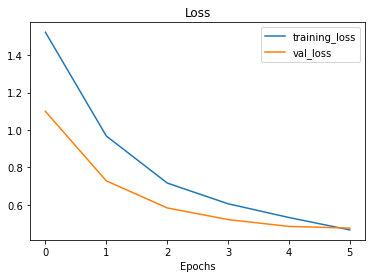

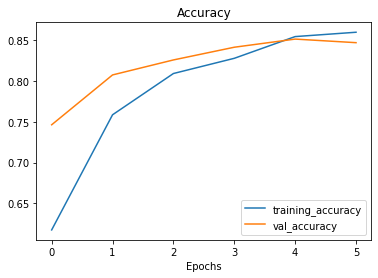

In [109]:
plot_loss_curves(history_fine_tune)

In [110]:
# Let's create a function to plot loss curves before and after fine tunning
def compare_history(original_history, new_history, initial_epochs=5):
  """
  Compares two tensorflow history objects
  """
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]
  
  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history with new history metrics
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = acc + new_history.history["val_accuracy"]
  total_val_loss = loss + new_history.history["val_loss"]

  plt.figure(figsize=(10,7))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")

  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tunning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")


  plt.subplot(2,1,2)
  plt.plot(total_loss, label="Training loss")
  plt.plot(total_val_loss, label="Val loss")

  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tunning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation loss")

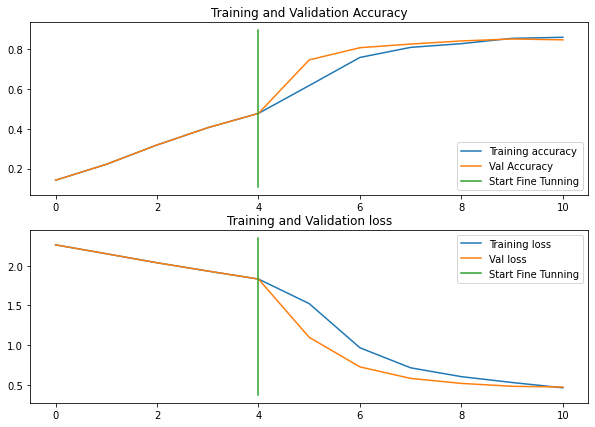

In [111]:
compare_history(history_2, history_fine_tune)

# Model 4: Fine tuning with 100% of data

In [112]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-02-19 22:22:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.153.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  42.0MB/s    in 13s     

2023-02-19 22:22:44 (39.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [136]:
train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

walk_through_dir("/content/10_food_classes_all_data/")

There are 2 directories and 0 images in '/content/10_food_classes_all_data/'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/hamburg

In [137]:
# Setup data input
import tensorflow as tf
IMG_SIZE = (224,224)

train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                     image_size=IMG_SIZE,
                                                                     label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [127]:
# To train a fine tuning model we need to revert model 2 back to its feature extraction weights
# Load weights  from checkpoint
# Revert after festure extraction

model_2.load_weights(checkpoint_path)

1. Train a feature extraction transfer learning model with data augmentation and save model checkpoint
2. Fine-tune the same model on the same 10% of data with 10 top layer unfrozen
3. Saved the result and training each time
4. Reload the model from step 1 to do the same steps as 2 except this time we're going to use all of the data

In [129]:
# Check which layers are tuneable
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation_layer True
2 efficientnetb0 True
3 global_average_pooling2d_7 True
4 dense_3 True


In [130]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_8 False
1 rescaling_14 False
2 normalization_7 False
3 rescaling_15 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [133]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [138]:
history_full_fine_tune = model_2.fit(train_data_all, 
                                     epochs=fine_tune_epochs,
                                     steps_per_epoch=len(train_data_all),
                                     validation_data=test_data,
                                     validation_steps=(0.25*len(test_data)),
                                     initial_epoch=initial_epochs,
                                     callbacks=[create_tensorboard_callback("transfer_learning", "all_data_fine_tune")])

Saving TensorBoard log files to: transfer_learning/all_data_fine_tune/20230219-224058
Epoch 6/10
235/235 [==============================] - 76s 322ms/step - loss: 0.5557 - accuracy: 0.8171 - val_loss: 0.2992 - val_accuracy: 0.8969
Epoch 7/10
235/235 [==============================] - 76s 321ms/step - loss: 0.4443 - accuracy: 0.8612 - val_loss: 0.2959 - val_accuracy: 0.9000
Epoch 8/10
235/235 [==============================] - 71s 299ms/step - loss: 0.4046 - accuracy: 0.8691 - val_loss: 0.2557 - val_accuracy: 0.9125
Epoch 9/10
235/235 [==============================] - 67s 281ms/step - loss: 0.3592 - accuracy: 0.8857 - val_loss: 0.2390 - val_accuracy: 0.9156
Epoch 10/10
235/235 [==============================] - 72s 307ms/step - loss: 0.3293 - accuracy: 0.8941 - val_loss: 0.2728 - val_accuracy: 0.9125


In [139]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.2513 - accuracy: 0.9168


[0.2513044774532318, 0.9168000221252441]

# Viewing our experiments data on tensorboard

In [142]:
!tensorboard dev upload --logdir ./transfer_learning --name "Transfer learning wiht food 101" --description "Fine tuning experiments" --one_shot

2023-02-19 22:50:56.015982: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-19 22:50:56.016080: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-19 22:50:56.016099: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBo

In [144]:
!tensorboard dev list

2023-02-19 22:58:10.629324: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-19 22:58:10.629439: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-19 22:58:10.629458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
https://tensorboard.dev/experiment/Wwc7EXr1Q9KSDnqD3k13lA/
	Name                 Transfer learning wiht food 101
	Description          Fine tuning experiments
	Id     

In [145]:
!tensorboard dev delete --experiment_id Wwc7EXr1Q9KSDnqD3k13lA

2023-02-19 22:58:30.928694: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-19 22:58:30.928790: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-19 22:58:30.928810: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Deleted experiment Wwc7EXr1Q9KSDnqD3k13lA.
